In this notebook, we will explore the different ways to create advanced plots in python and how to customize them to fit our needs. 
Additionally, we'll look at how to create interactive plots that allow users to explore the data and how to do templates for consistent styling across multiple plots, projects and latex documents.


In [100]:
# Let's start by importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# import the data from the excel file with multiple sheets

df0 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=0)
df1 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=1)
df2 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=2)
df3 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=3)

# Concatenate all sheets into a single DataFrame
df = pd.concat([df0, df1, df2, df3], ignore_index=True)

### 1. Set a custom style
lets set a custom style for our plots using matplotlib's style module, we can use pre-defined styles or create our own.  

In [101]:
# Custom style for academic/research plots with vivid colors

# Configure matplotlib to use LaTeX fonts
plt.rcParams.update({
    # Font settings - LaTeX style
    'font.family': 'serif',
    'font.serif': ['Computer Modern Roman', 'Times New Roman', 'DejaVu Serif'],
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16,
    
    
    # Grid settings - darker and more visible
    'grid.alpha': 0.6,
    'grid.color': '#2a2a2a',
    'grid.linewidth': 0.6,
    'grid.linestyle': '-',
    
    # Axes settings
    'axes.grid': True,
    'axes.linewidth': 1.2,
    'axes.edgecolor': '#333333',
    'axes.labelweight': 'normal',
    
    # Figure settings
    'figure.facecolor': 'white',
    'axes.facecolor': '#fafafa',
    
    # Line settings
    'lines.linewidth': 2,
    'lines.markersize': 6,
    
    # Legend settings
    'legend.frameon': True,
    'legend.framealpha': 0.9,
    'legend.fancybox': False,
    'legend.edgecolor': '#333333',
})

# Vivid color palette (strong, saturated colors)
vivid_colors = [
    '#E63946',  # Vivid Red
    '#1D3557',  # Navy Blue
    '#2A9D8F',  # Teal
    '#F77F00',  # Orange
    '#8338EC',  # Purple
    '#06D6A0',  # Mint Green
    '#FFB703',  # Yellow
    '#C1121F',  # Dark Red
    '#0353A4',  # Blue
    '#B5179E',  # Magenta
]

# Set the color cycle for plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=vivid_colors)

# Seaborn integration
sns.set_palette(vivid_colors)
sns.set_style("whitegrid", {
    'grid.color': '#2a2a2a',
    'grid.alpha': 0.6,
    'grid.linewidth': 0.6,
})


Theres an aditional option for full latex rendering, but it requires a full latex installation on your system. 
just add the following lines to the custom style cell.

```python
plt.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amssymb}',
})
```

### 2. Zoom
In this section, we will learn how to zoom and pan in plots using Matplotlib. This is useful when we want to focus on a specific area of the plot or when we want to explore the data in more detail.

C:\Users\ricar\AppData\Local\Temp\ipykernel_22016\1003212904.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


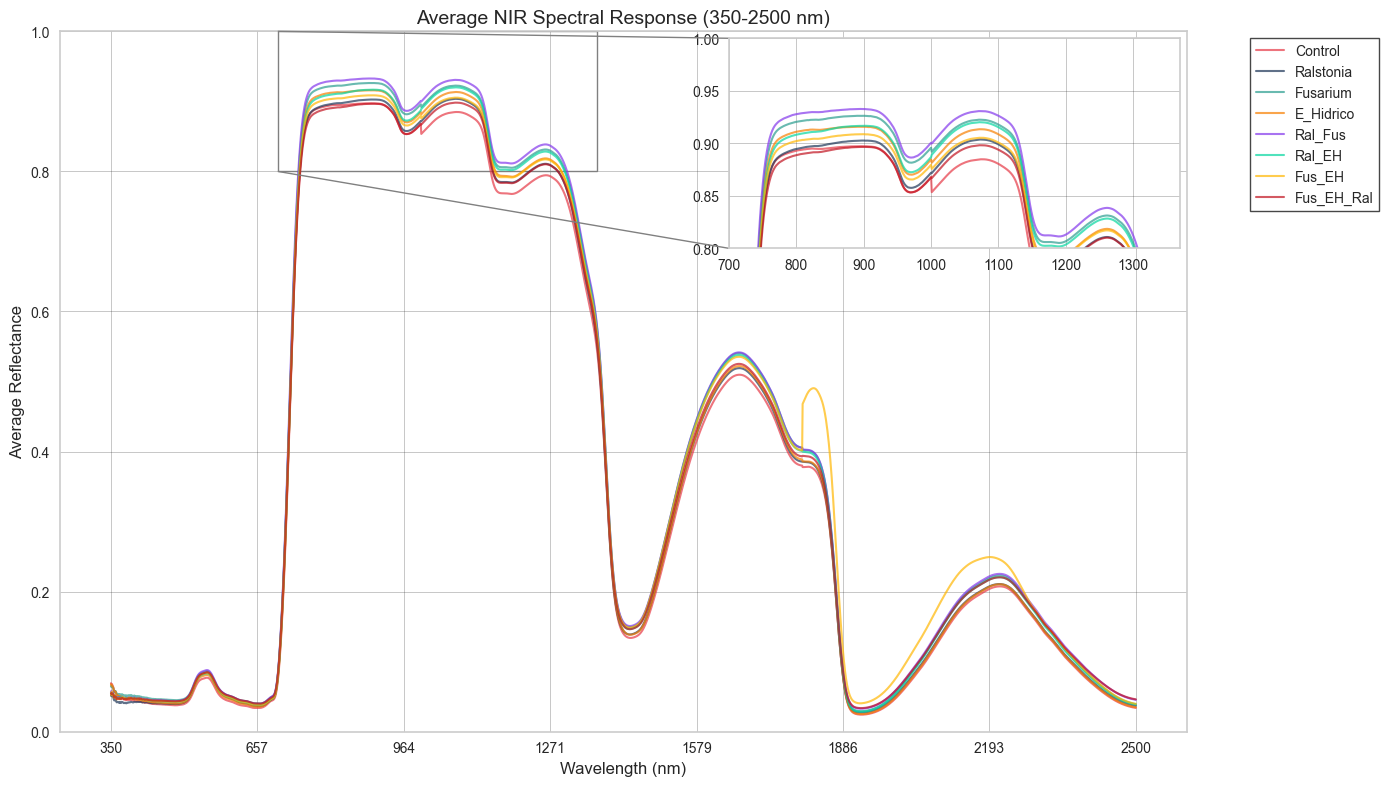

In [102]:
# Create a single figure for all plant indices
fig, ax = plt.subplots(figsize=(14, 8))

# Get the wavelength columns (assuming they are named as integers)
wavelengths = [int(col) for col in df.columns if str(col).isdigit()]

# Plot average curves for each treatment
for treatment in df['Tratamiento'].unique(): 
    # Filter rows for the current treatment
    plants_index = df[df['Tratamiento'] == treatment]

    # Calculate the mean reflectance values across all plants with this treatment
    mean_values = plants_index[wavelengths].mean()

    # Plot the average values for this treatment
    ax.plot(wavelengths, mean_values, linewidth=1.5, label=f'{treatment}', alpha=0.7)

# Create a zoomed inset
axins = inset_axes(ax, width="40%", height="30%", loc="upper right")

# Plot the same data in the inset with zoom limits
for treatment in df['Tratamiento'].unique():
    plants_index = df[df['Tratamiento'] == treatment]
    mean_values = plants_index[wavelengths].mean()
    axins.plot(wavelengths, mean_values, linewidth=1.5, alpha=0.7)

# Set the zoom limits
axins.set_xlim(700, 1370)
axins.set_ylim(0.8, 1.0)
axins.grid(True, alpha=0.3)

# Connect the inset with the main plot
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")

# Customize main plot
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Average Reflectance')
ax.set_title('Average NIR Spectral Response (350-2500 nm)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xticks(np.linspace(min(wavelengths), max(wavelengths), 8))
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

Template for adding zoomed inset plots:

Generates a plot of series data with a zoomed-in inset.

This function plots the average series for each group specified
in the dataframe and adds an inset plot to show a detailed view of a
specific region. It assumes the numeric column names are the x-values.

Args and Parameters:
- **df (pd.DataFrame):** The input dataframe in "wide" format. Must contain a column for grouping and numeric columns for series data.
- **group_col (str):** The name of the column to group the data by (e.g., 'Category').
- **zoom_xlim (tuple):** A tuple (min, max) for the x-axis limits of the inset plot.
- **zoom_ylim (tuple):** A tuple (min, max) for the y-axis limits of the inset plot.
- **title (str, optional):** The main title for the plot.
- **xlabel (str, optional):** The label for the x-axis.
- **ylabel (str, optional):** The label for the y-axis.
- **ylim (tuple, optional):** A tuple (min, max) for the y-axis limits of the main plot.Defaults to None (automatic scaling).
- **inset_loc (str, optional):** The location of the inset plot (e.g., 'upper right').


```python
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import pandas as pd
import numpy as np

def plot_with_zoomed_inset(df, group_col, zoom_xlim, zoom_ylim,
                                   title='Grouped Series with Zoomed Inset',
                                   xlabel='X-axis',
                                   ylabel='Average Value',
                                   ylim=None,
                                   inset_loc='upper right'):
    
    # --- 1. Setup the Main Plot ---
    fig, ax = plt.subplots(figsize=(14, 8))

    # Dynamically get the feature columns by selecting all numeric columns
    feature_cols = df.select_dtypes(include=np.number).columns.tolist()

    # --- 2. Plot Average Curves on Main Axes ---
    for group in df[group_col].unique():
        group_df = df[df[group_col] == group]
        group_mean_series = group_df[feature_cols].mean()
        ax.plot(feature_cols, group_mean_series, linewidth=1.5, label=str(group), alpha=0.8)

    # --- 3. Create and Configure the Inset Plot ---
    axins = inset_axes(ax, width="40%", height="30%", loc=inset_loc)

    for group in df[group_col].unique():
        group_df = df[df[group_col] == group]
        group_mean_series = group_df[feature_cols].mean()
        axins.plot(feature_cols, group_mean_series, linewidth=1.5, alpha=0.8)

    axins.set_xlim(zoom_xlim)
    axins.set_ylim(zoom_ylim)
    axins.grid(True, linestyle=':', alpha=0.5)
    axins.tick_params(axis='x', labelsize=8)
    axins.tick_params(axis='y', labelsize=8)

    # --- 4. Connect Inset to Main Plot ---
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

    # --- 5. Final Customization of Main Plot ---
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    ax.grid(True, linestyle=':', alpha=0.5)
    if ylim:
        ax.set_ylim(ylim)

    plt.tight_layout(rect=[0, 0, 0.88, 1])
    plt.show()
```

### Full template function for academic/research plots:


The function generates a high-quality, publication-ready plot from a DataFrame.

This template is designed for academic purposes, providing fine-grained control
over styling, colors, labels, and annotations. It assumes the DataFrame is in a
"wide" format, where one column identifies the group and the remaining numeric
columns represent the x-axis values for the series.

##### Args:
- **df (pd.DataFrame):** The input DataFrame.
- **group_col (str):** The column name to group data by.
- **title (str):** The main title of the plot.
- **xlabel (str):** The label for the x-axis.
- **ylabel (str):** The label for the y-axis.
- **figsize (tuple):** The (width, height) of the figure in inches.
- **style (str):** The Seaborn style theme (e.g., 'darkgrid', 'whitegrid', 'ticks').
- **palette (str or list):** The name of the Seaborn color palette or a list of colors.
- **custom_styles (dict, optional):** A dictionary mapping group names to specific line styles (e.g., {'Group A': '--'}).
- **title_fontsize (int):** Font size for the plot title.
- **label_fontsize (int):** Font size for the x and y axis labels.
- **tick_fontsize (int):** Font size for the axis tick labels.
- **legend_title (str, optional):** A custom title for the plot legend.
- **annotations (list of dicts, optional):** A list of annotations to add to the plot. Each dict should contain 'text', 'xy', and optional 'xytext', 'arrowprops'.  
- **spines_to_remove (list):** A list of spines to hide (e.g., ['top', 'right']).
- **grid_alpha (float):** The transparency of the grid lines.


In [103]:

def create_academic_plot(df, group_col,
                         # --- Core Plotting ---
                         title='Default Title', xlabel='X-axis', ylabel='Y-axis', figsize=(10, 6),
                         # --- Styling & Colors ---
                         style='whitegrid', palette='viridis', custom_styles=None, linewidth=1.5,
                         # --- Labels & Fonts ---
                         title_fontsize=16, label_fontsize=12, tick_fontsize=10, legend_title=None,
                         # --- Annotations & Layout ---
                         annotations=None, spines_to_remove=['top', 'right'], grid_alpha=0.5):
    
    # 1. Set the overall aesthetic style of the plot
    sns.set_style(style)

    # 2. Create the figure and axes objects with a specified size
    fig, ax = plt.subplots(figsize=figsize)

    # 3. Prepare color and style cycles
    unique_groups = df[group_col].unique()
    colors = sns.color_palette(palette, n_colors=len(unique_groups))

    # Get the numeric columns that represent the x-axis
    numeric_cols = df.select_dtypes(include=np.number).columns
    
    # Convert column names to integers for proper plotting
    x_values = [int(col) for col in numeric_cols if str(col).isdigit()]

    # 4. Plot the data for each group
    for i, group in enumerate(unique_groups):
        # Filter data for the current group and calculate the mean series
        group_data = df[df[group_col] == group]
        y_values = group_data[x_values].mean()

        # Determine line style for the current group
        linestyle = custom_styles.get(group, '-') if custom_styles else '-'

        ax.plot(x_values, y_values,
                label=group,
                color=colors[i],
                linestyle=linestyle,
                linewidth=linewidth, # Thicker lines for clarity
                alpha=0.8)

    # 5. Customize Labels, Titles, and Ticks with font control
    ax.set_title(title, fontsize=title_fontsize, fontweight='bold', pad=20)
    ax.set_xlabel(xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabel, fontsize=label_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

    # 6. Add a Legend with a title
    legend = ax.legend(title=legend_title or group_col, bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.setp(legend.get_title(), fontsize=label_fontsize) # Set legend title font size

    # 7. Add Annotations to highlight key points
    if annotations:
        for ann in annotations:
            ax.annotate(
                text=ann['text'],
                xy=ann['xy'],
                xytext=ann.get('xytext', (20, -20)),
                textcoords='offset points',
                arrowprops=ann.get('arrowprops', dict(arrowstyle="->", color='black')),
                fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", lw=1, alpha=0.7)
            )

    # 8. Customize Grids and Spines for a cleaner look
    if style in ['whitegrid', 'darkgrid']:
        ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=grid_alpha)
    sns.despine(ax=ax, top='top' in spines_to_remove, right='right' in spines_to_remove,
                left='left' in spines_to_remove, bottom='bottom' in spines_to_remove)

    # 9. Adjust layout to prevent labels from being cut off
    plt.tight_layout(rect=[0, 0, 0.88, 1]) # Make space for the legend
    plt.show()



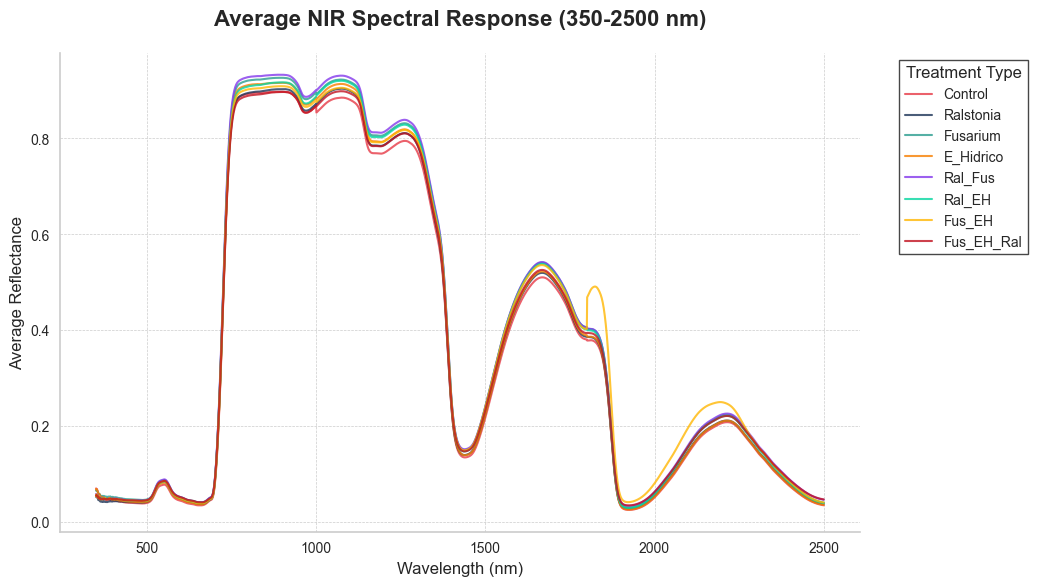

In [104]:
# Lets use the function to create a plot 

create_academic_plot(df, group_col='Tratamiento',
                     title='Average NIR Spectral Response (350-2500 nm)',
                     xlabel='Wavelength (nm)', 
                     ylabel='Average Reflectance',
                     figsize=(12, 6), 
                     style='whitegrid', 
                     palette=vivid_colors,  
                     custom_styles=None,
                     linewidth=1.5,  
                     annotations=None,  
                     legend_title='Treatment Type',
                     spines_to_remove=['top', 'right'],
                     grid_alpha=1)

### Multiple plot type options.
    
Parameters:
-----------
- **plot_type** : str
    Type of plot to create:
    - 'line': Line plot (default)
    - 'bar': Grouped bar chart
    - 'scatter': Scatter plot with lines
    - 'area': Area plot (filled)
    - 'lollipop': Lollipop chart (stem plot)
    - 'step': Step plot
- **bar_width** : float
    Width of bars for bar charts (default: 0.8)
- **marker_size** : int
    Size of markers for scatter plots (default: 6)
- **alpha** : float
    Transparency level (default: 0.8)


In [105]:
def create_academic_plot_type(df, group_col,
                         # --- Core Plotting ---
                         title='Default Title', xlabel='X-axis', ylabel='Y-axis', figsize=(10, 6),
                         plot_type='line',  #'line', 'bar', 'scatter', 'area', 'lollipop'
                         # --- Styling & Colors ---
                         style='whitegrid', palette='viridis', custom_styles=None, linewidth=1.5,
                         # --- Labels & Fonts ---
                         title_fontsize=16, label_fontsize=12, tick_fontsize=10, legend_title=None,
                         # --- Annotations & Layout ---
                         annotations=None, spines_to_remove=['top', 'right'], grid_alpha=0.5,
                         # --- Plot-specific options ---
                         bar_width=0.8, marker_size=6, alpha=0.8):

 
    # 1. Set the overall aesthetic style of the plot
    sns.set_style(style)

    # 2. Create the figure and axes objects with a specified size
    fig, ax = plt.subplots(figsize=figsize)

    # 3. Prepare color and style cycles
    unique_groups = df[group_col].unique()
    colors = sns.color_palette(palette, n_colors=len(unique_groups))

    # Get the numeric columns that represent the x-axis
    numeric_cols = df.select_dtypes(include=np.number).columns
    
    # Convert column names to integers for proper plotting
    x_values = [int(col) for col in numeric_cols if str(col).isdigit()]

    # 4. Plot the data for each group based on plot_type
    if plot_type == 'bar':
        # Calculate bar positions for grouped bars
        num_groups = len(unique_groups)
        bar_width_adjusted = bar_width / num_groups
        
        for i, group in enumerate(unique_groups):
            group_data = df[df[group_col] == group]
            y_values = group_data[x_values].mean()
            
            # Offset bars for each group
            x_positions = np.array(x_values) + (i - num_groups/2 + 0.5) * bar_width_adjusted
            
            ax.bar(x_positions, y_values,
                   width=bar_width_adjusted,
                   label=group,
                   color=colors[i],
                   alpha=alpha,
                   edgecolor='black',
                   linewidth=0.5)
    
    elif plot_type == 'lollipop':
        for i, group in enumerate(unique_groups):
            group_data = df[df[group_col] == group]
            y_values = group_data[x_values].mean()
            
            # Create lollipop effect: stems + markers
            ax.stem(x_values, y_values, 
                    linefmt=colors[i], 
                    markerfmt='o',
                    basefmt=' ',
                    label=group)
            
            # Customize markers
            lines = ax.get_lines()
            plt.setp(lines[-2:], color=colors[i], linewidth=linewidth, alpha=alpha)
    
    elif plot_type == 'scatter':
        for i, group in enumerate(unique_groups):
            group_data = df[df[group_col] == group]
            y_values = group_data[x_values].mean()
            
            linestyle = custom_styles.get(group, '-') if custom_styles else '-'
            
            # Plot line + markers
            ax.plot(x_values, y_values,
                    label=group,
                    color=colors[i],
                    linestyle=linestyle,
                    linewidth=linewidth,
                    marker='o',
                    markersize=marker_size,
                    alpha=alpha)
    
    elif plot_type == 'area':
        for i, group in enumerate(unique_groups):
            group_data = df[df[group_col] == group]
            y_values = group_data[x_values].mean()
            
            ax.fill_between(x_values, y_values,
                            label=group,
                            color=colors[i],
                            alpha=alpha * 0.6,
                            linewidth=linewidth,
                            edgecolor=colors[i])
    
    elif plot_type == 'step':
        for i, group in enumerate(unique_groups):
            group_data = df[df[group_col] == group]
            y_values = group_data[x_values].mean()
            
            ax.step(x_values, y_values,
                    label=group,
                    color=colors[i],
                    linewidth=linewidth,
                    alpha=alpha,
                    where='mid')
    
    else:  # Default: 'line'
        for i, group in enumerate(unique_groups):
            group_data = df[df[group_col] == group]
            y_values = group_data[x_values].mean()
            
            linestyle = custom_styles.get(group, '-') if custom_styles else '-'
            
            ax.plot(x_values, y_values,
                    label=group,
                    color=colors[i],
                    linestyle=linestyle,
                    linewidth=linewidth,
                    alpha=alpha)

    # 5. Customize Labels, Titles, and Ticks with font control
    ax.set_title(title, fontsize=title_fontsize, fontweight='bold', pad=20)
    ax.set_xlabel(xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabel, fontsize=label_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

    # 6. Add a Legend with a title
    legend = ax.legend(title=legend_title or group_col, 
                       bbox_to_anchor=(1.04, 1), 
                       loc="upper left",
                       framealpha=0.9)
    plt.setp(legend.get_title(), fontsize=label_fontsize)

    # 7. Add Annotations to highlight key points
    if annotations:
        for ann in annotations:
            ax.annotate(
                text=ann['text'],
                xy=ann['xy'],
                xytext=ann.get('xytext', (20, -20)),
                textcoords='offset points',
                arrowprops=ann.get('arrowprops', dict(arrowstyle="->", color='black')),
                fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", lw=1, alpha=0.7)
            )

    # 8. Customize Grids and Spines for a cleaner look
    if style in ['whitegrid', 'darkgrid']:
        ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=grid_alpha)
    sns.despine(ax=ax, top='top' in spines_to_remove, right='right' in spines_to_remove,
                left='left' in spines_to_remove, bottom='bottom' in spines_to_remove)

    # 9. Adjust layout to prevent labels from being cut off
    plt.tight_layout(rect=[0, 0, 0.88, 1])
    plt.show()

In [106]:
# Lets make a df for each plot type so we can visualize them better
df_scatter = df.copy()
df_area = df.copy()
df_lollipop = df.copy()
df_step = df.copy()

# Lets make a df for each plot type so we can visualize them better

# Get wavelength columns between 1500 and 2000 nm
wavelength_cols = [col for col in df.columns 
                   if str(col).isdigit() and 1500 <= int(col) <= 2000]

wavelength_close = [col for col in df.columns
                       if str(col).isdigit() and 1500 <= int(col) <= 1600]

# Create filtered dataframes
df_scatter = df[df['Tratamiento'] == 'Control'][['Tratamiento'] + wavelength_close]
df_area = df[df['Tratamiento'] == 'Fus_EH_Ral'][['Tratamiento'] + wavelength_cols]
df_lollipop = df[df['Tratamiento'] == 'E_Hidrico'][['Tratamiento'] + wavelength_close]
df_step = df[['Tratamiento'] + wavelength_close]


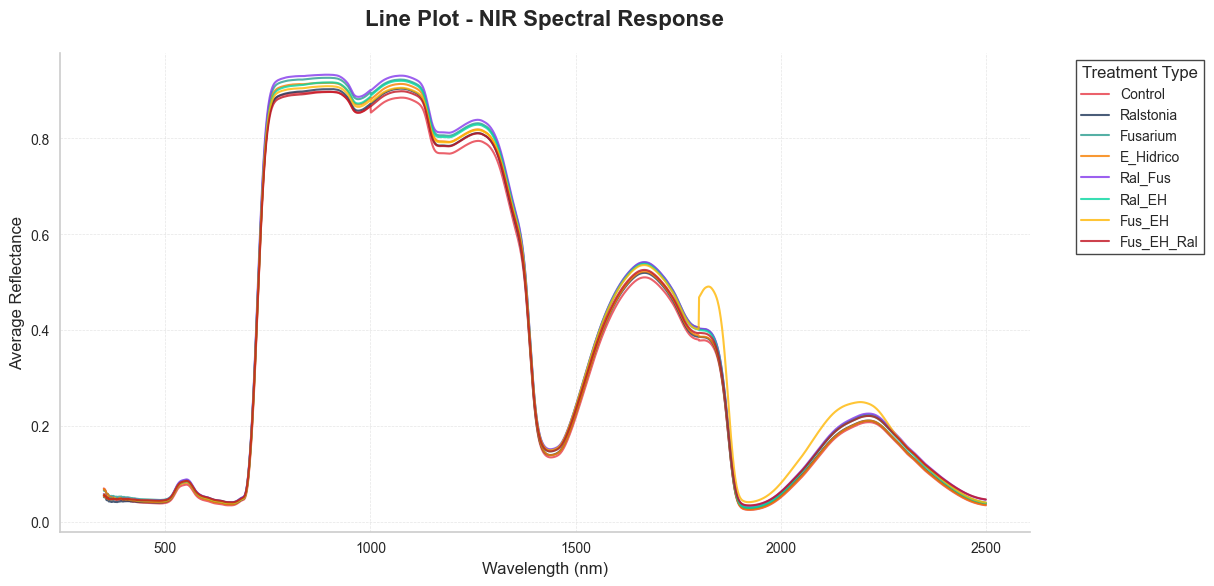

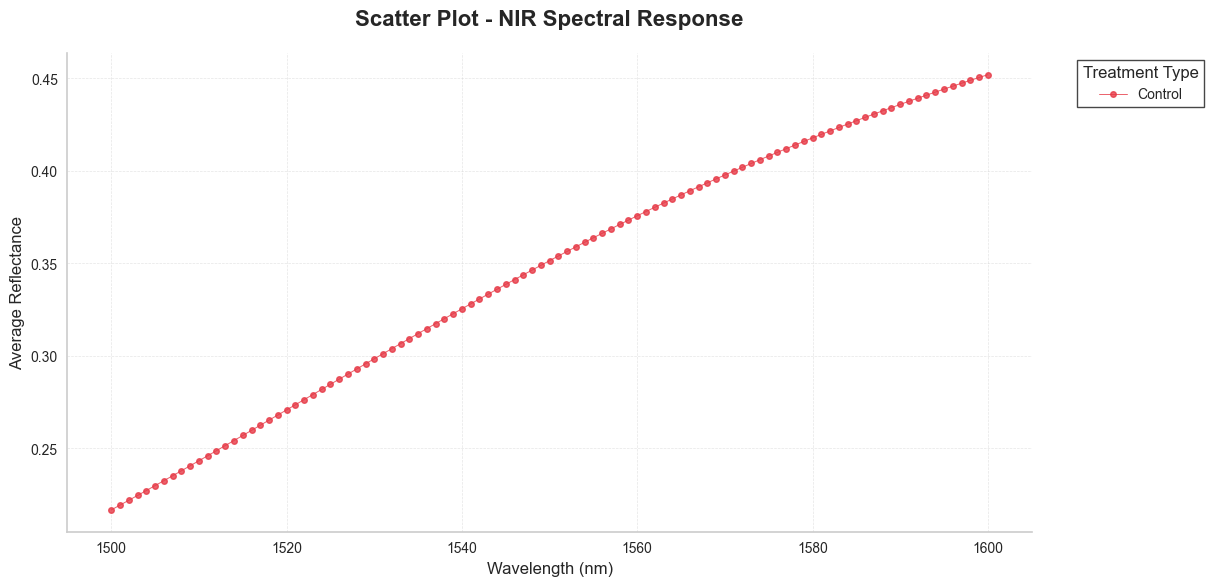

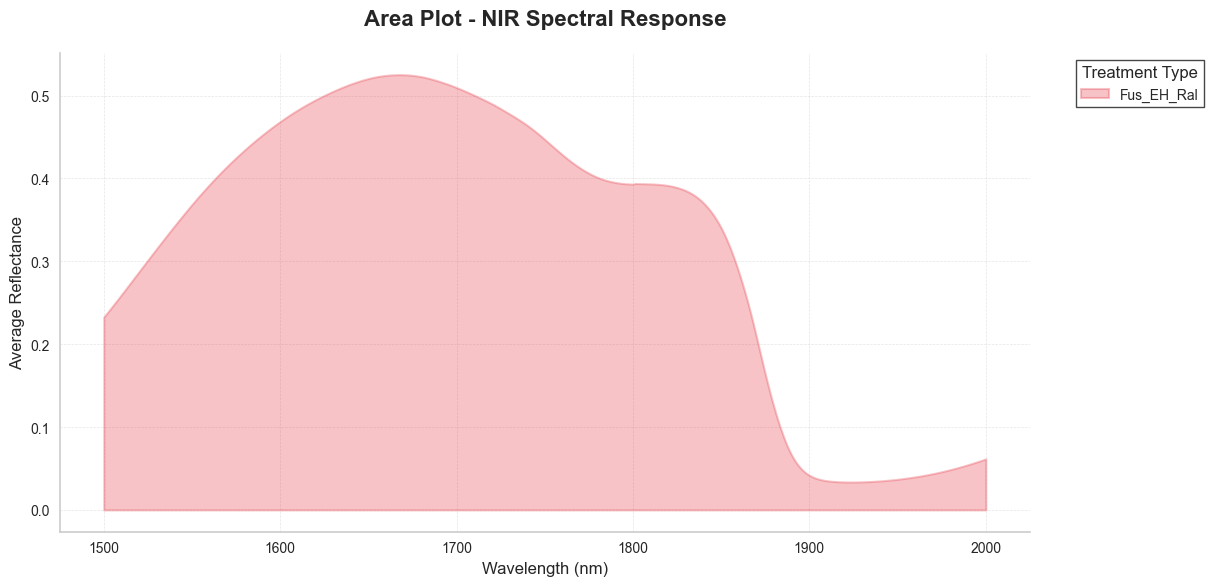

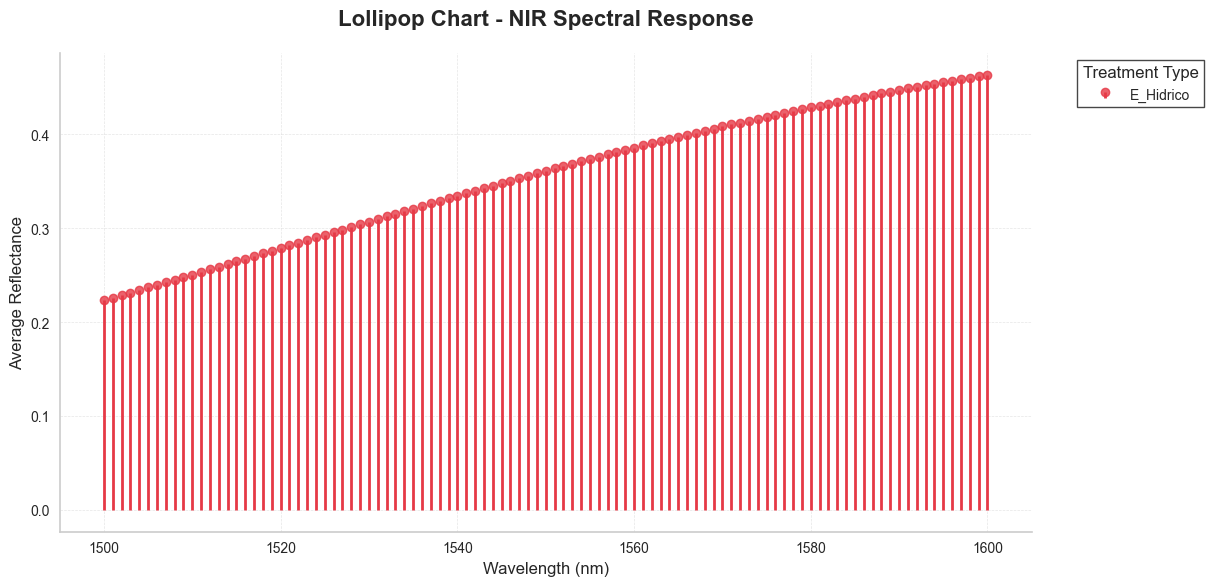

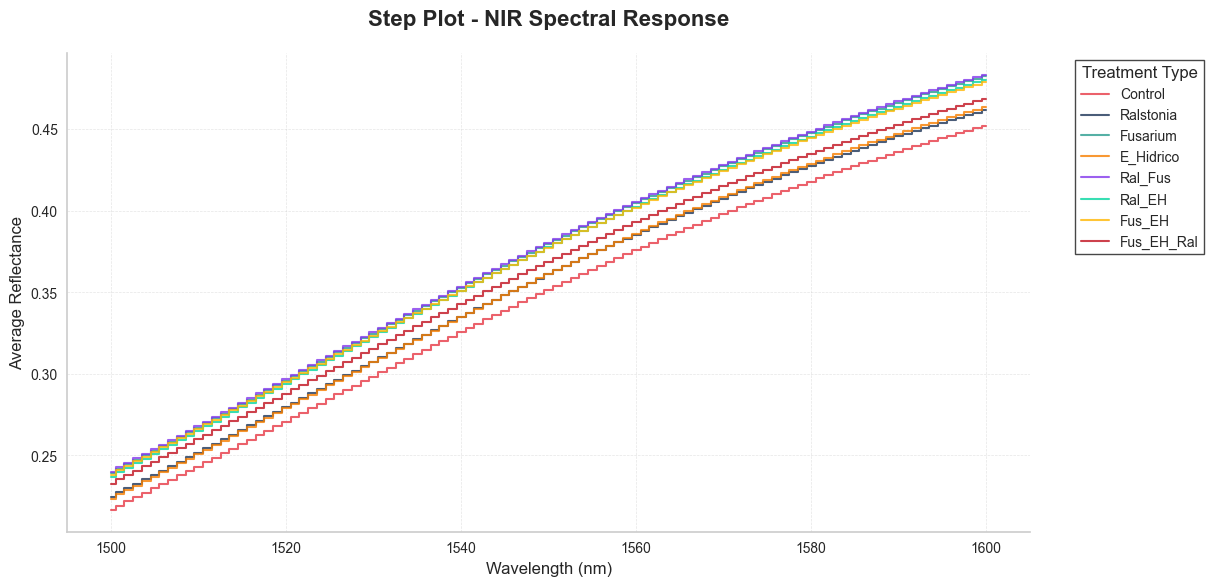

In [107]:
# 1. Line Plot (default)
create_academic_plot_type(df, group_col='Tratamiento',
                     title='Line Plot - NIR Spectral Response',
                     xlabel='Wavelength (nm)', 
                     ylabel='Average Reflectance',
                     figsize=(14, 6), 
                     plot_type='line',
                     palette=vivid_colors,
                     legend_title='Treatment Type')



# 2. Scatter Plot with markers
create_academic_plot_type(df_scatter, group_col='Tratamiento',
                     title='Scatter Plot - NIR Spectral Response',
                     xlabel='Wavelength (nm)', 
                     ylabel='Average Reflectance',
                     figsize=(14, 6), 
                     plot_type='scatter',
                     marker_size=4,
                     palette=vivid_colors,
                     linewidth=0.7,
                     legend_title='Treatment Type')

# 3. Area Plot (filled)
create_academic_plot_type(df_area, group_col='Tratamiento',
                     title='Area Plot - NIR Spectral Response',
                     xlabel='Wavelength (nm)', 
                     ylabel='Average Reflectance',
                     figsize=(14, 6), 
                     plot_type='area',
                     alpha=0.5,
                     palette=vivid_colors,
                     legend_title='Treatment Type')

# 4. Lollipop Chart
create_academic_plot_type(df_lollipop, group_col='Tratamiento',
                     title='Lollipop Chart - NIR Spectral Response',
                     xlabel='Wavelength (nm)', 
                     ylabel='Average Reflectance',
                     figsize=(14, 6), 
                     plot_type='lollipop',
                     palette=vivid_colors,
                     legend_title='Treatment Type')

# 5. Step Plot
create_academic_plot_type(df_step, group_col='Tratamiento',
                     title='Step Plot - NIR Spectral Response',
                     xlabel='Wavelength (nm)', 
                     ylabel='Average Reflectance',
                     figsize=(14, 6), 
                     plot_type='step',
                     palette=vivid_colors,
                     legend_title='Treatment Type')